## Формули на Гаус-Льожандър:

| Брой възли | Коефициенти                 | Възли                          | АСТ |
|-----------|-----------------------------|--------------------------------|-----|
| 1         | A₁ = 2                      | x₁ = 0                         | 1   |
| 2         | A₁ = 1<br>A₂ = 1            | x₁ = −1/√3<br>x₂ = 1/√3        | 3   |
| 3         | A₁ = 5/9<br>A₂ = 8/9<br>A₃ = 5/9 | x₁ = −√(3/5)<br>x₂ = 0<br>x₃ = √(3/5) | 5   |

## Задача 1
Да се пресметне приближено стойността на интеграла
$\displaystyle I= \int_{0}^{4} \left( \frac{x^4}{8} - x^3 + 7.01x^2 - 16.05x + 12.06 \right)\, dx
$, където $f(x) =  \displaystyle \frac{x^4}{8} - x^3 + 7.01x^2 - 16.05x + 12.06 $, като се използват формулите на Гаус–Льожандър с 2 и 3 възела с подходяща смяна на променливите. Да се сравни резултатът с точната стойност. Да се сравни със стойностите, получени по формулите
на трапеците и на Симпсън.

Original:  30.9866666666667
Gaus-Legendre 2 nodes:  30.275555555555556
Gaus-Legendre 3 nodes:  30.986666666666657
Trapezi:  80.16
Simpson:  32.05333333333333


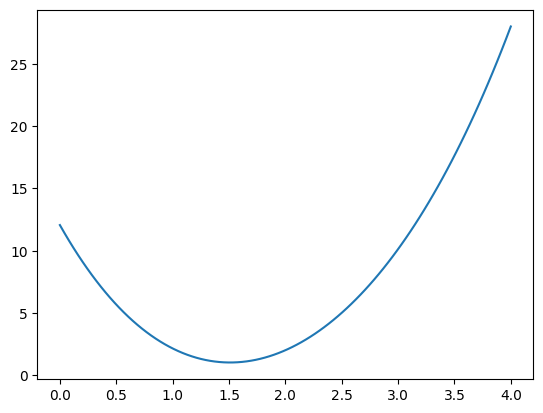

In [8]:
import sympy, numpy
import matplotlib.pyplot as plt
# на контролното ще трябва сам да си изведеш таблицита
# за да сметнем задачата трябва да сменим интервала на интеграла за да е от -1 до 1

a = 0
b = 4
def f(x):
    return (x**4)/8 - x**3 + 7.01*x**2 - 16.05*x + 12.06

def phi(t):
    return f((b+a)/2 + t*(b-a)/2)*(b-a)/2

x=sympy.symbols('x')

print("Original: ", sympy.integrate(f(x),(x,a,b)))
print("Gaus-Legendre 2 nodes: ", phi(-numpy.sqrt(3)/3) + phi(numpy.sqrt(3)/3))
print("Gaus-Legendre 3 nodes: ", (5/9) * phi(-numpy.sqrt(3/5)) + (8/9) * phi(0) + (5/9) * phi(numpy.sqrt(3/5)))

# сега с трапеци и симпсън
print("Trapezi: ", (b-a)/2*(f(a)+f(b)))
print("Simpson: ", (b-a)/6*(f(a)+4*f((a+b)/2)+f(b)))

interval = numpy.linspace(a,b,100)
plt.plot(interval, f(interval))

## Задача 2
Да се намери приближено решение на уравнението $e^x-3 = 0$ с грешка, ненадминаваща $\epsilon  = 0.00001$, като се използва:
* методът на бисекцията;
* методът на Нютон (Newton-Raphson).

### Bisection method


In [14]:
# за да определим интервала чертаем функцията
interval = numpy.linspace(-5,5,100)
def f(x):
    return numpy.e**x - 3
#plt.plot(interval, f(interval), interval, numpy.zeros(len(interval)))
# виждаме че коренът е между 0 и 2
a=0
b=2
epsilon=10**(-5)
iterations = 0

while (abs(b-a)>epsilon):
    if (f(a)*f((a+b)/2)<0):
        b=(a+b)/2
    else:
        a=(a+b)/2
    iterations+=1
    
print("After", iterations, "iterations the answer is ", (a+b)/2)

After 18 iterations the answer is  1.0986137390136719


### Newton method

In [16]:
def f(x):
    return numpy.e**x - 3

def der_f(x):
    return numpy.e**x

maxIterations = 50
xcurr = 2
xnext = xcurr - f(xcurr)/der_f(xcurr)

epsilon=10**(-5)
iterations = 1

while (iterations < maxIterations and abs(xnext - xcurr)>epsilon):
    xcurr = xnext
    xnext = xcurr - f(xcurr)/der_f(xcurr)
    iterations += 1
    
print("After", iterations, "iterations the answer is ", xnext)

After 5 iterations the answer is  1.0986122886681922
